# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Raja Fathimah Hervina
- **Email:** rajafathimah.eva@gmail.com
- **ID Dicoding:** m002b4kx3661

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana rata-rata jumlah penyewaan sepeda oleh pengguna 'casual' dan pengguna 'registered' selama 4 musim dalam dua tahun (2011-2012)?
- Pertanyaan 2: Apakah faktor cuaca seperti suhu, kelembapan, dan kecepatan angin ('temp', 'hum', dan 'windspeed') mempengaruhi jumlah total penyewaan sepeda pada hari kerja (working days) dibandingkan dengan akhir pekan (weekends) selama periode 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
# import data dati github pribadi
day_df = pd.read_csv('https://raw.githubusercontent.com/rajafathimahh/PROYEK-EVA/refs/heads/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring


**Insight:**
- Pengumpulan data dilakukan dengan meng-impor file dataset day.csv dan yang tersimpan di folder github
- Data set yang dikumpulkan terdiri atas 1 tabel data dengan 16 kolom

### Assessing Data

Untuk data day.csv

In [39]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dteday        731 non-null    object 
 2   season        731 non-null    int64  
 3   yr            731 non-null    int64  
 4   mnth          731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weathersit    731 non-null    int64  
 9   temp          731 non-null    float64
 10  atemp         731 non-null    float64
 11  hum           731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  cnt           731 non-null    int64  
 16  season_label  731 non-null    object 
dtypes: float64(4), int64(11), object(2)
memory usage: 97.2+ KB


In [40]:
day_df.isna().sum() # memastikan apakah ada missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [41]:
print("Jumlah duplikasi: ", day_df.duplicated().sum()) # memastikan apakah ada data terduplikasi

Jumlah duplikasi:  0


In [42]:
day_df.describe() # memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday yang direpresentasikan sebagai datetime, bukan object
- Jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.
- Tidak ada data yang terduplikasi dalam day_df.

### Cleaning Data

In [43]:
# Menangani inaccurate value dengan mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [44]:
# Memastikan kembali tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday        731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   yr            731 non-null    int64         
 4   mnth          731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weathersit    731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731 non-null    int64     

**Insight:**
- Tipe data untuk kolom dteday pada day_df sudah diubah dari object menjadi datetime
- Tipe data untuk kolom dteday pada hour_df sudah diubah dari object menjadi datetime
- Dilakukan pengkategorian data numerical ke descriptive pada kolom data season, weathersit, weekday, month, holiday, and workingday.

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [46]:
# Mengelompokkan data berdasarkan kolom 'season' terhadap jumlah pengguna 'casual' dan 'registered'
season_casual_registered = day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"]
})
season_casual_registered

casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
1        3155    9   334.928177  387.655561       5315  416  2269.204420   
2        3410  120  1106.097826  737.590829       6456  674  3886.233696   
3        3160  118  1202.611702  595.975032       6917  889  4441.691489   
4        3031    2   729.112360  606.318118       6946   20  3999.050562   

                     
                std  
season               
1       1200.269751  
2       1353.375628  
3       1304.626949  
4       1444.782557

Keterangan season :
- 1 = springer (musim semi)
- 2 = summer (musim panas)
- 3 = fall (musim gugur)
- 4 = winter (musim dingin)

In [47]:
# Mengelompokkan data berdasarkan kolom 'workingday'
workday_weather_users = day_df.groupby(by="workingday").agg({
    "temp": ["mean", "max", "min", "std"],
    "hum": ["mean", "max", "min", "std"],
    "windspeed": ["mean", "max", "min", "std"],
    "cnt": ["mean", "max", "min", "std"]
})

# Menampilkan hasil
workday_weather_users


temp                                     hum            \
                mean       max       min       std      mean       max   
workingday                                                               
0           0.481213  0.861667  0.059130  0.187285  0.622800  0.948261   
1           0.501932  0.848333  0.097391  0.180876  0.630248  0.972500   

                               windspeed                                \
                 min       std      mean       max       min       std   
workingday                                                               
0           0.187917  0.145050  0.192628  0.507463  0.042304  0.078194   
1           0.000000  0.141287  0.189497  0.441563  0.022392  0.077233   

                    cnt                          
                   mean   max  min          std  
workingday                                       
0           4330.168831  8714  605  2052.141245  
1           4584.820000  8362   22  1878.415583

Keterangan workingday:
- Hari kerja (bukan akhir pekan (weekend) atau hari libur (holiday)) = 1
- Akhir pekan = 0

**Insight:**
- Pada musim semi (1), rata-rata pengguna 'casual' hanya sebesar 335, sedangkan pengguna 'registered' sebesar 2269 pengguna. Pada musim panas (2), rata-rata pengguna 'casual' sebesar 1106, sedangkan pengguna 'registered' sebesar 3886 pengguna. Pada musim gugur (3), rata-rata pengguna 'casual' sebesar 1203, sedangkan pengguna 'registered' sebesar 4442 pengguna. Terakhir, pada musim dingin (4), rata-rata pengguna 'casual' sebesar 729, sedangkan pengguna 'registered' sebesar 3999 pengguna.
- Rata-rata pengguna 'casual' lebih kecil daripada pengguna 'registered', artinya pengguna 'casual' lebih sedikit.
- Musim yang memiliki rata-rata pengguna tertinggi baik 'casual' maupun 'registered' adalah musim gugur, dan musim dengan rata-rata terendah adalah musim semi.


- Pada saat akhir pekan (0), dengan suhu rata-rata 0.48, kelembapan rata-rata 0.62, dan kecepatan angin rata-rata 0.19, jumlah pengguna/penyewa sepeda total mencapai rata-rata sebesar 4330 pengguna.
- Pada saat hari kerja (1), dengan suhu rata-rata 0.50, kelembapan rata-rata 0.63, dan kecepatan angin rata-rata 0.19, jumlah pengguna/penyewa sepeda total mencapai rata-rata sebesar 1878 pengguna.
- Nilai rata-rata faktor cuaca seperti suhu, kelembapan, dan kecepatan angin tidak memiliki perbedaan yang cukup signifikan pada saat akhir pekan maupun hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana rata-rata jumlah penyewaan sepeda oleh pengguna 'casual' dan pengguna 'registered' selama 4 musim dalam dua tahun (2011-2012)?

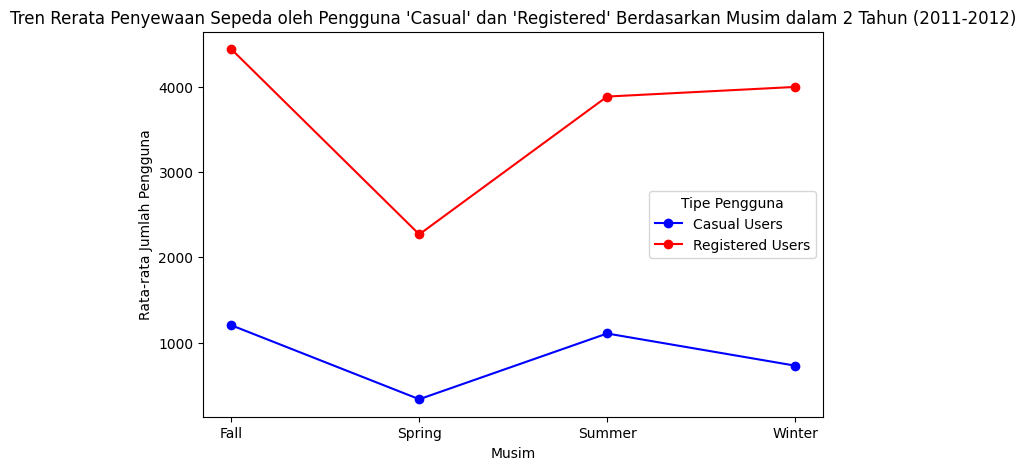

In [48]:
# Visualisasi dengan Line Chart
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season_label"] = day_df["season"].map(season_labels)

# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah casual dan registered
seasonal_trend = day_df.groupby("season_label")[["casual", "registered"]].mean()


plt.figure(figsize=(8, 5))

plt.plot(seasonal_trend.index, seasonal_trend["casual"], marker="o", label="Casual Users", color="blue")
plt.plot(seasonal_trend.index, seasonal_trend["registered"], marker="o", label="Registered Users", color="red")
plt.title("Tren Rerata Penyewaan Sepeda oleh Pengguna 'Casual' dan 'Registered' Berdasarkan Musim dalam 2 Tahun (2011-2012)")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Pengguna")
plt.legend(title="Tipe Pengguna")

plt.show()


- Line chart di atas menunjukkan tren rata-rata penyewaan sepeda oleh pengguna 'casual' dan 'registered' selama 4 musim dalam 2 tahun, dari 2011-2012.
- Pengguna 'casual' direpresentasikan oleh garis biru dan pengguna 'registered direpresentasikan oleh garis merah.
- Terlihat bahwa rata-rata pengguna 'registered' selalu di atas pengguna 'casual' dan keduanya memiliki titik tertinggi di saat musim gugur atau 'fall', dan titik terendah saat musim semi atau 'spring.


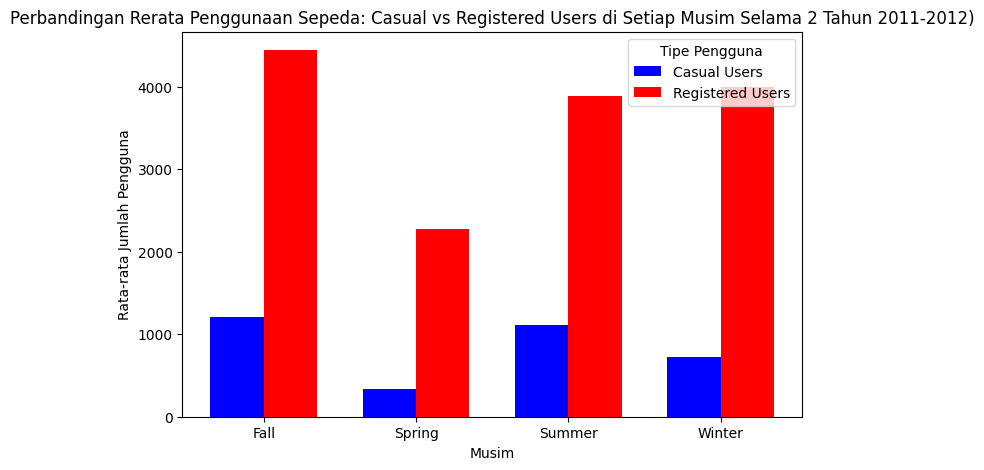

In [49]:
x = np.arange(len(seasonal_trend))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, seasonal_trend["casual"], width, label="Casual Users", color="blue")
plt.bar(x + width/2, seasonal_trend["registered"], width, label="Registered Users", color="red")

plt.title("Perbandingan Rerata Penggunaan Sepeda: Casual vs Registered Users di Setiap Musim Selama 2 Tahun 2011-2012)")
plt.xlabel("Musim")
plt.xticks(x, seasonal_trend.index)
plt.ylabel("Rata-rata Jumlah Pengguna")
plt.legend(title="Tipe Pengguna")
plt.show()

- Bar chart di atas menunjukkan perbandingan rata-rata penyewaan sepeda oleh pengguna 'casual' dan 'registered' selama 4 musim dalam 2 tahun, dari 2011-2012.
- Pengguna 'casual' direpresentasikan oleh batang biru dan pengguna 'registered direpresentasikan oleh batang merah.
- Terlihat bahwa rata-rata pengguna 'registered' selalu di atas pengguna 'casual' dan keduanya memiliki nilai tertinggi di saat musim gugur atau 'fall', dan nilai terendah saat musim semi atau 'spring.

### Pertanyaan 2: Apakah faktor cuaca seperti 'temp', 'hum', dan 'windspeed' mempengaruhi jumlah total penyewaan sepeda pada hari kerja (working days) dibandingkan dengan akhir pekan (weekends) selama periode 2011-2012?

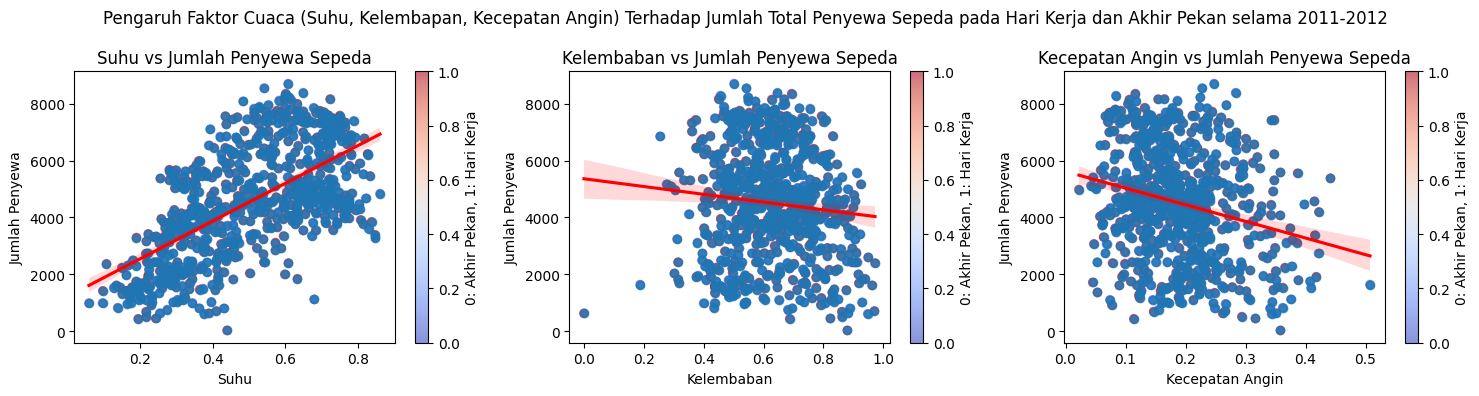

In [50]:
# Visualisasi Scatter Plot dan Regression
# Untuk melihat korelasi variable
plt.figure(figsize=(15, 4))

# Scatter plot 'temp' vs 'cnt'
plt.subplot(1, 3, 1)
plt.scatter(day_df['temp'], day_df['cnt'], c=day_df['workingday'], cmap='coolwarm', alpha=0.6)
sns.regplot(x='temp', y='cnt', data=day_df, line_kws={'color': 'red'})
plt.title('Suhu vs Jumlah Penyewa Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewa')
plt.colorbar(label='0: Akhir Pekan, 1: Hari Kerja')


# Scatter plot 'hum' vs 'cnt'
plt.subplot(1, 3, 2)
plt.scatter(day_df['hum'], day_df['cnt'], c=day_df['workingday'], cmap='coolwarm', alpha=0.6)
sns.regplot(x='hum', y='cnt', data=day_df, line_kws={'color': 'red'})
plt.title('Kelembaban vs Jumlah Penyewa Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewa')
plt.colorbar(label='0: Akhir Pekan, 1: Hari Kerja')


# Scatter plot 'windspeed vs 'cnt'
plt.subplot(1, 3, 3)
plt.scatter(day_df['windspeed'], day_df['cnt'], c=day_df['workingday'], cmap='coolwarm', alpha=0.6)
sns.regplot(x='windspeed', y='cnt', data=day_df, line_kws={'color': 'red'})
plt.title('Kecepatan Angin vs Jumlah Penyewa Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewa')
plt.colorbar(label='0: Akhir Pekan, 1: Hari Kerja')

plt.suptitle("Pengaruh Faktor Cuaca (Suhu, Kelembapan, Kecepatan Angin) Terhadap Jumlah Total Penyewa Sepeda pada Hari Kerja dan Akhir Pekan selama 2011-2012")
plt.tight_layout()
plt.show()


- Scatter plot pada masing-masing faktor cuaca terhadap jumlah penyewa/pengguna memperlihatkan bahwa titik-titik data tersebar luas, dan dengan hasil plot regresi linear, titik-titik data baik pada suhu, kelembapan, maupun kecepatan angin terlihat tidak mendekati garis regresi.

**Insight:**
- Dari line chart dan bar chart terkait rerata penggunaan sepeda oleh pengguna 'casual' dan 'registered' yang masing-masing direpresentasikan oleh warna biru dan merah terlihat bahwa rata-rata pengguna 'registered' selalu di atas pengguna 'casual' dan keduanya memiliki nilai tertinggi di saat musim gugur atau 'fall', dan nilai terendah saat musim semi atau 'spring.
- Dari scatter plot dan regresion plot pada pengaruh faktor cuaca terhadap jumlah pengguna terlihat bahwa masing-masing faktor cuaca seperti suhu atau 'temp', kelembapan atau 'hum', dan kecepatan angin atau 'windspeed', memiliki data yang tidak linear.

## Analisis Lanjutan (Opsional)

Untuk analisis lanjutan, dilakukan dengan RFM analysis berdasarkan segmen 'casual' dan 'registered' secara keseluruhan:
- Recency: Menghitung jumlah hari sejak terakhir kali ada penyewaan sepeda dalam dataset, baik untuk pengguna 'casual' maupun 'registered'.
- Frequency: Menghitung total frekuensi penyewaan sepeda oleh pengguna 'casual' dan 'registered'.
- Monetary: Menggunakan jumlah penyewaan sepeda total, kita akan menghitung total penyewaan untuk setiap tipe pengguna.

In [51]:
# RFM Analysis
import datetime as dt

# Mendefinikan tanggal hari ini berdasarkan dataset's maximum date (tanggal terakhir di data set)
today_date = day_df['dteday'].max() + pd.DateOffset(1)

# Recency
rfm_casual = day_df[day_df['casual'] > 0].groupby("dteday").agg({
    "casual": "sum"
}).reset_index()
rfm_registered = day_df[day_df['registered'] > 0].groupby("dteday").agg({
    "registered": "sum"
}).reset_index()
rfm_casual['Recency'] = (today_date - rfm_casual['dteday']).dt.days
rfm_registered['Recency'] = (today_date - rfm_registered['dteday']).dt.days

# Frequency
frequency_casual = day_df.groupby("season")["casual"].sum().reset_index(name="Frequency_Casual")
frequency_registered = day_df.groupby("season")["registered"].sum().reset_index(name="Frequency_Registered")

# Monetary
monetary_casual = day_df.groupby("season")["casual"].sum().reset_index(name="Monetary_Casual")
monetary_registered = day_df.groupby("season")["registered"].sum().reset_index(name="Monetary_Registered")

# Mengkombinasikan komponne RFM ke dalam satu DataFrame
rfm_casual = pd.DataFrame({
    "Recency_Casual": rfm_casual["Recency"].mean(),
    "Frequency_Casual": frequency_casual["Frequency_Casual"].sum(),
    "Monetary_Casual": monetary_casual["Monetary_Casual"].sum()
}, index=[0])

rfm_registered = pd.DataFrame({
    "Recency_Registered": rfm_registered["Recency"].mean(),
    "Frequency_Registered": frequency_registered["Frequency_Registered"].sum(),
    "Monetary_Registered": monetary_registered["Monetary_Registered"].sum()
}, index=[0])
rfm_summary = pd.concat([rfm_casual, rfm_registered], axis=1)

rfm_summary


,Recency_Casual,Frequency_Casual,Monetary_Casual,Recency_Registered,Frequency_Registered,Monetary_Registered
0,366.0,620017,620017,366.0,2672662,2672662


- Recency: jumlah hari terakhir sejak ada penyewaan sepeda untuk pengguna 'casual' dan 'registered' adalah sama, yaitu 366 hari.
- Frequency: total frekuensi penyewaan sepeda selama 4 musim dalam 2 tahun ini oleh pengguna 'casual' adalah 620017, sedangkan oleh pengguna 'registered' adalah 2672662. Pengguna 'registered' jauh lebih banyak daripada pengguna 'casual'.
- Monetary: jumlah total penyewaan sepeda adalah gabungan dari total 'casual' sebanyak 620017 dan total 'registered' sebanyak 2672662, yaitu sebesar 3292679.

Dengan hasil demikian, terlihat bahwa pengguna 'registered' menyewa sepeda lebih sering dibandingkan dengan pengguna 'casual', dan pengguna 'registered' cenderung berkontribusi lebih banyak dibandingkan pengguna 'casual' dalam hal frekuensi dan jumlah penyewaan sepeda, yang sejalan dengan tren sebelumnya.

## Conclusion

Dengan pertanyaan bisnis:
- Pertanyaan 1: Bagaimana rata-rata jumlah penyewaan sepeda oleh pengguna 'casual' dan pengguna 'registered' selama 4 musim dalam dua tahun (2011-2012)?
- Pertanyaan 2: Apakah faktor cuaca seperti 'temp', 'hum', dan 'windspeed' mempengaruhi jumlah total penyewaan sepeda pada hari kerja (working days) dibandingkan dengan akhir pekan (weekends) selama periode 2011-2012?

Conclusion/Kesimpulan:
- Conclution pertanyaan 1:

Rata-rata jumlah penyewaan sepeda oleh pengguna 'casual' selalu lebih rendah daripada pengguna 'registered' selama 4 musim pada 2011-2012, dengan musim yang memiliki rata-rata pengguna tertinggi baik 'casual' maupun 'registered' adalah musim gugur, dan musim dengan rata-rata terendah adalah musim semi. Terlihat bahwa pengguna 'registered' lebih sering menyewa sepeda dibandingkan pengguna 'casual'.

Lebih jelasnya, pada musim semi (spring), rata-rata pengguna 'casual' hanya sebesar 335, sedangkan pengguna 'registered' sebesar 2269 pengguna. Pada musim panas (summer), rata-rata pengguna 'casual' sebesar 1106, sedangkan pengguna 'registered' sebesar 3886 pengguna. Pada musim gugur (fall), rata-rata pengguna 'casual' sebesar 1203, sedangkan pengguna 'registered' sebesar 4442 pengguna. Terakhir, pada musim dingin (winter), rata-rata pengguna 'casual' sebesar 729, sedangkan pengguna 'registered' sebesar 3999 pengguna.

- Conclution pertanyaan 2:

Faktor cuaca seperti suhu, kelembapan, dan kecepatan angin ('tempt', 'hum', dan 'windspeed') terhadap jumlah total penyewaan sepeda baik pada hari kerja dan akhir pekan selama 2011-2012 memiliki pengaruh yang sangat kecil karena nilai rata-rata setiap faktor cuaca tersebut tidak memiliki perbedaan yang cukup signifikan pada saat akhir pekan maupun hari kerja.

Selain itu, jumlah pengguna pada akhir pekan sebanyak 4330, jauh lebih tinggi dibandingkan dengan hari kerja yang sebanyak 1878. Meskipun faktor cuaca tidak menunjukkan perbedaan yang signifikan, hasil ini menunjukkan bahwa ada faktor lain yang mendorong lebih banyak orang untuk menggunakan sepeda pada akhir pekan, seperti waktu luang pada hari libur.

- Conclution RFM Analysis:

Selain jawaban 2 pertanyaan bisnis, juga dilakukan analisis lanjutan dengan teknik RFM Analysis. Diperoleh hasil bahwa pengguna 'registered' cenderung berkontribusi lebih banyak dibandingkan pengguna 'casual' dalam hal frekuensi dan jumlah penyewaan sepeda dengan total sewa 2672662 banding 620017, serta jumlah hari terakhir sejak penyewaan sepeda untuk keduanya adalah 366 hari.

In [52]:
day_df.to_csv("day.csv", index=False)